# Principal Component Analysis

### Let's get to the most important parts of this data

## Starting Off

Currently when you have a lot of potential features to use in a model, how are you deciding which features to use in your final model, both the number and the specific features?

What are some advantages and disadvantages of this approach?

And how on earth do you handle mutlicolinearity in a dataset?

### Outcomes for today:
- Review components of PCA and its role in modeling
- Go through three demos - random data, small dataset, data image processing
- Pick the relevant components to keep
- Go through the lin-algebra method together if you all want


[Let's demo a concept with this first](https://www.desmos.com/calculator/tpahiv1skb)

Up until now, we have been looking in depth at supervised learning estimators: those estimators that predict labels based on labeled training data.

In this section, we explore what is perhaps one of the most broadly used of unsupervised algorithms, principal component analysis (PCA).
PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.
After a brief conceptual discussion of the PCA algorithm, we will see a couple examples of these further applications.



## The Curse of Dimensionality

As the dimensionality of the feature space increases, the number of configurations can grow exponentially, and the number of configurations covered by an observation decreases. 

As we add more dimensions we also increase the processing power we need to analyze the data, and we also increase the amount of training data required to make meaningful models.

### 1-d Space

![1d](https://cdn-images-1.medium.com/max/1600/1*V4g_LzDA0QhWrVbRJqSNLQ.png)

### 2d Space
![2d](https://cdn-images-1.medium.com/max/1600/1*m5i7BqDLiZ8t1tyQx8xWHQ.png)

### 3d Space

![3d](https://cdn-images-1.medium.com/max/1600/1*sKj4h8S1DRV7Phf22ycAbg.png)

As the number of dimensions increases what happens to the nubmer of observations needed to cover that space?

### Hughes Phenomenon

Hughes Phenomenon shows that as the number of features increases, the classifier’s performance increases as well until we reach the optimal number of features. Adding more features based on the same size as the training set will then degrade the classifier’s performance.

x: truism for any multi-dimensional data. 

y: accuracy of classifier.

![hughes](https://cdn-images-1.medium.com/max/1600/1*Ts2X2ow29QLDEeLvSE14Ew.png)

Glass dataset link for later :)  https://raw.githubusercontent.com/p-sama/Glass-Classification/master/glass.csv

## Introducing Principal Component Analysis

Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data.
Its behavior is easiest to visualize by looking at a two-dimensional dataset.
Consider the following 200 points:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

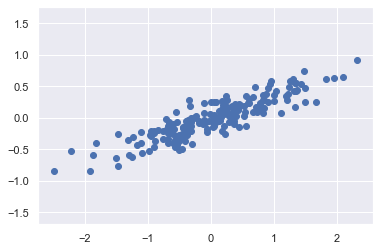

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [9]:
rng.rand(2, 2)

array([[0.46804955, 0.62985302],
       [0.15803183, 0.01478209]])

In [10]:
rng.randn(2, 200)

array([[ 5.68904091e-01,  1.92880031e+00,  1.07905705e+00,
        -6.86831626e-01, -4.30680627e-01, -5.97968543e-01,
        -9.13443410e-01, -6.23905153e-01,  2.61875479e-01,
        -5.87029005e-01,  8.76199863e-01,  1.23255464e-01,
        -3.97125683e-01,  8.86089920e-01,  3.18971826e-01,
         2.64867626e-01,  1.04003845e+00,  5.73265449e-01,
        -1.08898467e-01,  9.37554843e-01,  3.09317802e-01,
         2.91730876e+00,  1.09868850e+00,  1.15321262e+00,
         1.29099337e+00,  7.98396113e-02,  1.31289541e+00,
         2.33570276e-02, -8.31173403e-01, -5.63986458e-01,
         5.27950554e-01, -1.56111989e+00,  2.08352921e-01,
        -7.28350085e-01,  7.18216383e-01, -7.46173711e-01,
         1.87230326e+00,  7.67818129e-01, -1.26885896e+00,
         1.75875935e+00, -2.27252509e-01, -7.27476110e-01,
        -1.02379932e+00,  5.67764740e-01,  1.50452187e+00,
        -5.78426973e-01, -9.97620842e-01, -1.13970009e+00,
         1.49640531e+00,  1.67072922e+00, -3.48471140e-0

In [11]:
X.shape

(200, 2)

By eye, it is clear that there is a nearly linear relationship between the x and y variables.
The problem setting here is slightly different: rather than attempting to *predict* the y values from the x values, the unsupervised learning problem attempts to learn about the *relationship* between the x and y values.

In principal component analysis, this relationship is quantified by finding a list of the *principal axes* in the data, and using those axes to describe the dataset.
Using Scikit-Learn's ``PCA`` estimator, we can compute this as follows:

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

The fit learns some quantities from the data, most importantly the "components" and "explained variance":

In [22]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


The components are my new features: 2 columns of features. 

In [23]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


In [24]:
print(pca.explained_variance_.sum())

0.7810093963961741


In [52]:
print(pca.explained_variance_ratio_.sum())
# the ratios always add up to 1.

1.0000000000000002


The first component explains 76% of my output variance (first row); the second row explains only 1.8% of my output variance. Going down to 1-component will make me lose 1.8% of my model's explanatory power.

Here, 22% of dataset variance is lost due to PCA transformation. 

The sum of explained variance < 1.

In [25]:
# first observation in X (x1,x2):
X[1,:]

array([0.96069503, 0.5909006 ])

In [27]:
pca.transform(X[1,:].reshape(-1,1))
# I get new information for x1, x2:
# what's this step doing?

array([[-1.19273784,  0.60649622],
       [-0.72195777,  0.37876397]])

In [28]:
pca.transform(X)[1,:]

array([-1.07121393,  0.25724006])

In [26]:
# Try 1 component.

In [17]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [18]:
print(pca.components_)

[[-0.94446029 -0.32862557]]


In [19]:
print(pca.explained_variance_)

[0.7625315]


The 1 component is the same as first component as before. 

The PCAs are static objects, they are calculated from the underlying dataset. Changing n=2 to n=1 doesn't change the first component! 

In [20]:
# Going from two-input features to one-output component, which captures only 76% of the variance in outputs.
pca.transform(X)

array([[ 6.76769235e-01],
       [-1.07121393e+00],
       [ 7.27912364e-01],
       [ 2.30964136e+00],
       [ 6.30052323e-01],
       [ 1.02448887e+00],
       [ 7.77183507e-01],
       [-1.39656414e+00],
       [-2.91049874e-01],
       [ 1.88864221e+00],
       [-7.11544293e-01],
       [ 6.38884130e-01],
       [ 5.48059617e-01],
       [-2.19312436e-01],
       [-3.87789490e-01],
       [ 7.15219956e-01],
       [-1.08373816e+00],
       [-2.99917403e-01],
       [-7.96849021e-01],
       [-8.12568346e-01],
       [-1.54018281e+00],
       [-2.52920476e-01],
       [ 6.26464454e-01],
       [-1.61007571e+00],
       [ 5.04240563e-01],
       [ 5.53935753e-01],
       [ 6.81911252e-01],
       [-2.00157228e-02],
       [ 1.13550833e-01],
       [ 2.92286085e-02],
       [-2.14393483e-01],
       [-1.03406124e+00],
       [ 3.88635004e-01],
       [ 9.96727811e-01],
       [ 1.39223653e+00],
       [ 4.57043694e-01],
       [ 6.81839901e-01],
       [-9.05233246e-01],
       [ 4.9

To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

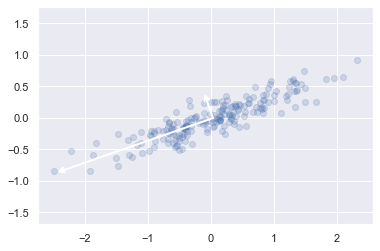

In [29]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

These vectors represent the *principal axes* of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis.
The projection of each data point onto the principal axes are the "principal components" of the data.

If we plot these principal components beside the original data, we see the plots shown here:

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.09-PCA-rotation.png?raw=1)


This transformation from data axes to principal axes is an *affine transformation*, which basically means it is composed of a translation, rotation, and uniform scaling.

While this algorithm to find principal components may seem like just a mathematical curiosity, it turns out to have very far-reaching applications in the world of machine learning and data exploration.

[Deep Dive on how the axes is determined](https://www.youtube.com/watch?v=_UVHneBUBW0)

[The linear algebra intuition behind this](https://www.youtube.com/watch?v=PFDu9oVAE-g)

### PCA as dimensionality reduction

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Here is an example of using PCA as a dimensionality reduction transform:

In [30]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


The transformed data has been reduced to a single dimension.
To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

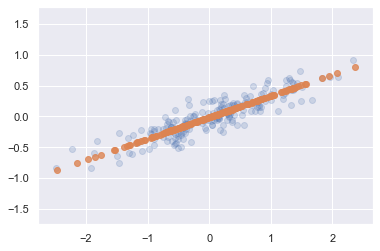

In [31]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version.
This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance.
The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

### Another view of what happened
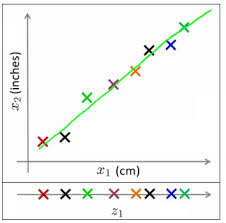

### PCA for visualization: Hand-written digits

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data.
To see this, let's take a quick look at the application of PCA to the digits data .

We start by loading the data:

In [32]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape
# we have 1797 observations, and 64 columns of information. 

(1797, 64)

In [33]:
digits['data'][1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [34]:
# converting 1-D array to 2-D array:
digits['data'][1].reshape((8,8))

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [37]:
# The array above is a 1.
digits['target'][1]

1

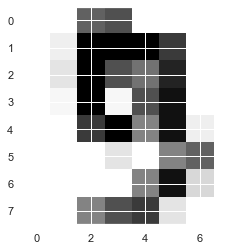

In [40]:
plt.imshow(digits['data'][9].reshape((8,8)), cmap='Greys')

The data consists of 8×8 pixel images, meaning that they are 64-dimensional.
To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

![MNIST](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

In [41]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


In [43]:
pca.explained_variance_

array([179.0069301 , 163.71774688])

We can now plot the first two principal components of each point to learn about the data:

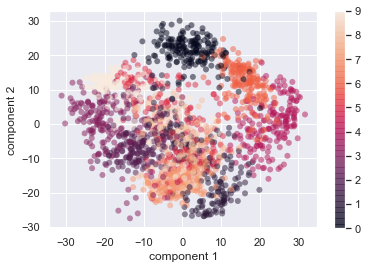

In [42]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            )
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

In [49]:
# creating our own colormap: https://matplotlib.org/3.1.1/tutorials/colors/colorbar_only.html
import matplotlib as mpl
cmap = mpl.colors.ListedColormap(['red', 'green', 'blue', 'yellow', 'purple',
                                 'orange', 'pink', 'brown', 'black', 'teal'])

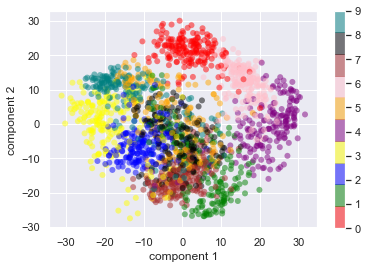

In [50]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap = cmap
            )
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

### What do we see in this 64-feature to 2-feature reduction? 

- There are some clear clusters on these two features, e.g. red (0), purple (4). 
- Numbers that are hard to distinguish: 5 & 8. 

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance.
Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

### Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data.
This can be determined by looking at the cumulative *explained variance ratio* as a function of the number of components:

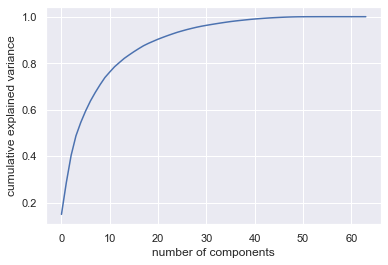

In [51]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [53]:
pca.explained_variance_ratio_
# from 1.01771796e-02 onwards, we start to get less than 1% of variance in data explained.

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

In [55]:
pca.explained_variance_ratio_[:20].sum()
# about 90% of variance explained by first 20 features! 

0.8943031165985266

In [56]:
pca.explained_variance_ratio_[:30].sum()
# 30 components explain 96% of data variance.

0.9590854042457173

In [57]:
pca = PCA(0.95)
pca.fit(digits.data)

PCA(n_components=0.95)

In [59]:
pca.explained_variance_ratio_.sum()

0.9547965245651597

In [58]:
len(pca.explained_variance_ratio_)

29

This curve quantifies how much of the total, 64-dimensional variance is contained within the first $N$ components.
For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance.  Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

## PCA as Noise Filtering

PCA can also be used as a filtering approach for noisy data.
The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise.
So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

Let's see how this looks with the digits data.
First we will plot several of the input noise-free data:

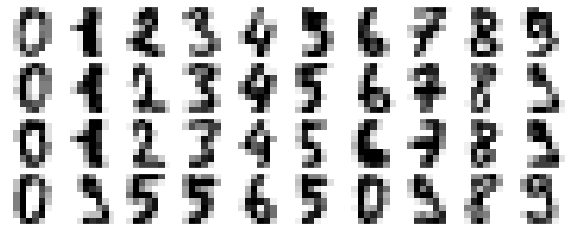

In [60]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Now lets add some random noise to create a noisy dataset, and re-plot it:

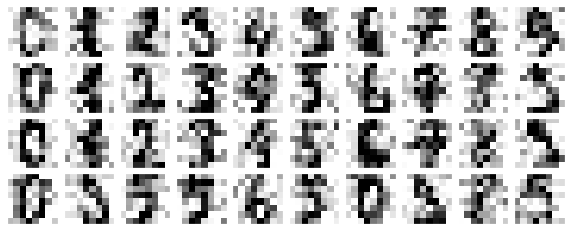

In [61]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

It's clear by eye that the images are noisy, and contain spurious pixels.
Let's train a PCA on the noisy data, requesting that the projection preserve 50% of the variance:

The components always sorted by how much variance they explain in the dataset. Hence sum of first 12 of full components is the same as sum of PCA(0.50) model = 0.5148965943078996

In [75]:
pca = PCA().fit(noisy)
pca.n_components_

64

In [76]:
pca.explained_variance_ratio_[:12].sum()

0.5148965943078996

In [83]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

In [84]:
pca.explained_variance_ratio_.sum()

0.5148965943078996

In [85]:
pca.components_[:1]
# these are eigenvalues associated with each columns on input.

array([[ 4.40262192e-03, -1.88464545e-02, -2.20344210e-01,
        -1.56827437e-01, -2.22348964e-02, -8.75998175e-02,
        -2.19062996e-03,  1.00913672e-02,  4.86825727e-04,
        -1.24273423e-01, -2.56972741e-01,  1.55855966e-01,
        -3.96804404e-02, -1.94472873e-01, -1.02311160e-02,
         6.89238483e-04, -1.03480103e-02, -8.02045160e-02,
         6.03957543e-02,  2.18120607e-01, -1.52599568e-01,
        -1.52549388e-01,  4.13131361e-02,  8.82154398e-03,
         4.11405265e-03,  6.47709991e-02,  2.47622264e-01,
        -1.77423947e-02, -1.83065358e-01, -4.27812495e-02,
         4.03455999e-02, -1.18623990e-02, -1.34212224e-03,
         1.57285131e-01,  3.61926575e-01,  1.90965920e-01,
         1.21718270e-01,  4.31913449e-02,  2.05357365e-02,
         9.21741628e-03,  1.24657131e-02,  9.23035131e-02,
         2.82126915e-01,  2.51606838e-01,  2.25553351e-01,
         1.11812919e-02, -3.35978836e-02,  1.33405641e-02,
         1.53354954e-04, -1.12003708e-02, -7.97670875e-0

Here 50% of the variance amounts to 12 principal components.
Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits:

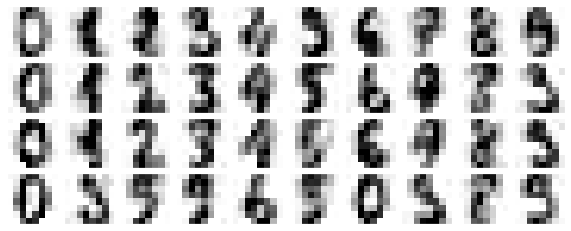

In [64]:
# noisy data that's been reduced to 12 components, maintaining 50% of the variance:
# no fit here because we've fit before
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

In [71]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(digits.data, digits.target)
svc.score(digits.data, digits.target)

0.996661101836394

In [72]:
svc.fit(noisy, digits.target)
svc.score(noisy, digits.target)
# Going from 64 to 12 components and after random noise filtered, we still get 98% accuracy! 

0.9844184752365053

This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.

In [80]:
# passing into regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(digits.data, digits.target)
lr.score(digits.data, digits.target)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1.0

In [81]:
pca = PCA(12)
X = pca.fit_transform(digits.data)
lr = LogisticRegression()
lr.fit(X, digits.target)
lr.score(X, digits.target)

# We see the score isn't as good, but due to feature reduction it saves time.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9588202559821926

## Principal Component Analysis Summary

We have discussed the use of principal component analysis for dimensionality reduction, for visualization of high-dimensional data, for noise filtering, and for feature selection within high-dimensional data.
Because of the versatility and interpretability of PCA, it has been shown to be effective in a wide variety of contexts and disciplines.
Given any high-dimensional dataset, I tend to start with PCA in order to visualize the relationship between points (as we did with the digits), to understand the main variance in the data (as we did with the eigenfaces), and to understand the intrinsic dimensionality (by plotting the explained variance ratio).
Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data.

PCA's main weakness is that it tends to be highly affected by outliers in the data.
For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components.
Scikit-Learn contains a couple interesting variants on PCA, including ``RandomizedPCA`` and ``SparsePCA``, both also in the ``sklearn.decomposition`` submodule.
``RandomizedPCA``, which we saw earlier, uses a non-deterministic method to quickly approximate the first few principal components in very high-dimensional data, while ``SparsePCA`` introduces a regularization term (see [In Depth: Linear Regression](05.06-Linear-Regression.ipynb)) that serves to enforce sparsity of the components.

In the following sections, we will look at other unsupervised learning methods that build on some of the ideas of PCA.

## Practice on new data set